<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Tesla stock vs Gamestop stock</h1>

In [3]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


In [7]:
tesla = yf.Ticker("TSLA")

In [8]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

In [10]:
soup = BeautifulSoup(html_data,"html5lib")

In [11]:
tables = soup.find_all("table")
table = None
for t in tables:
    if "Tesla Quarterly Revenue" in t.text:
        table = t
        break
tesla_revenue = []
for row in table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue and revenue != "-":
            tesla_revenue.append({"Date": date, "Revenue": revenue})

tesla_revenue = pd.DataFrame(tesla_revenue)

In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

In [13]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


In [15]:
GameStop = yf.Ticker("GME")

In [16]:
gme_data = GameStop.history(period="max")

In [17]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

In [19]:
soup = BeautifulSoup(html_data_2, "html.parser")

In [20]:
tbody=soup.find_all("tbody")[1]
gme_revenue=pd.DataFrame(columns=["Date","Revenue"])
for row in tbody.find_all("tr"):
    cols=row.find_all("td")
    if len(cols)<2:
        continue
    date=cols[0].text.strip()
    revenue=cols[1].text.strip()
    if not revenue or revenue=="-" or date.lower()=="date":
        continue
    revenue=revenue.replace("$","").replace(",","")
    gme_revenue=pd.concat([gme_revenue,pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

In [21]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


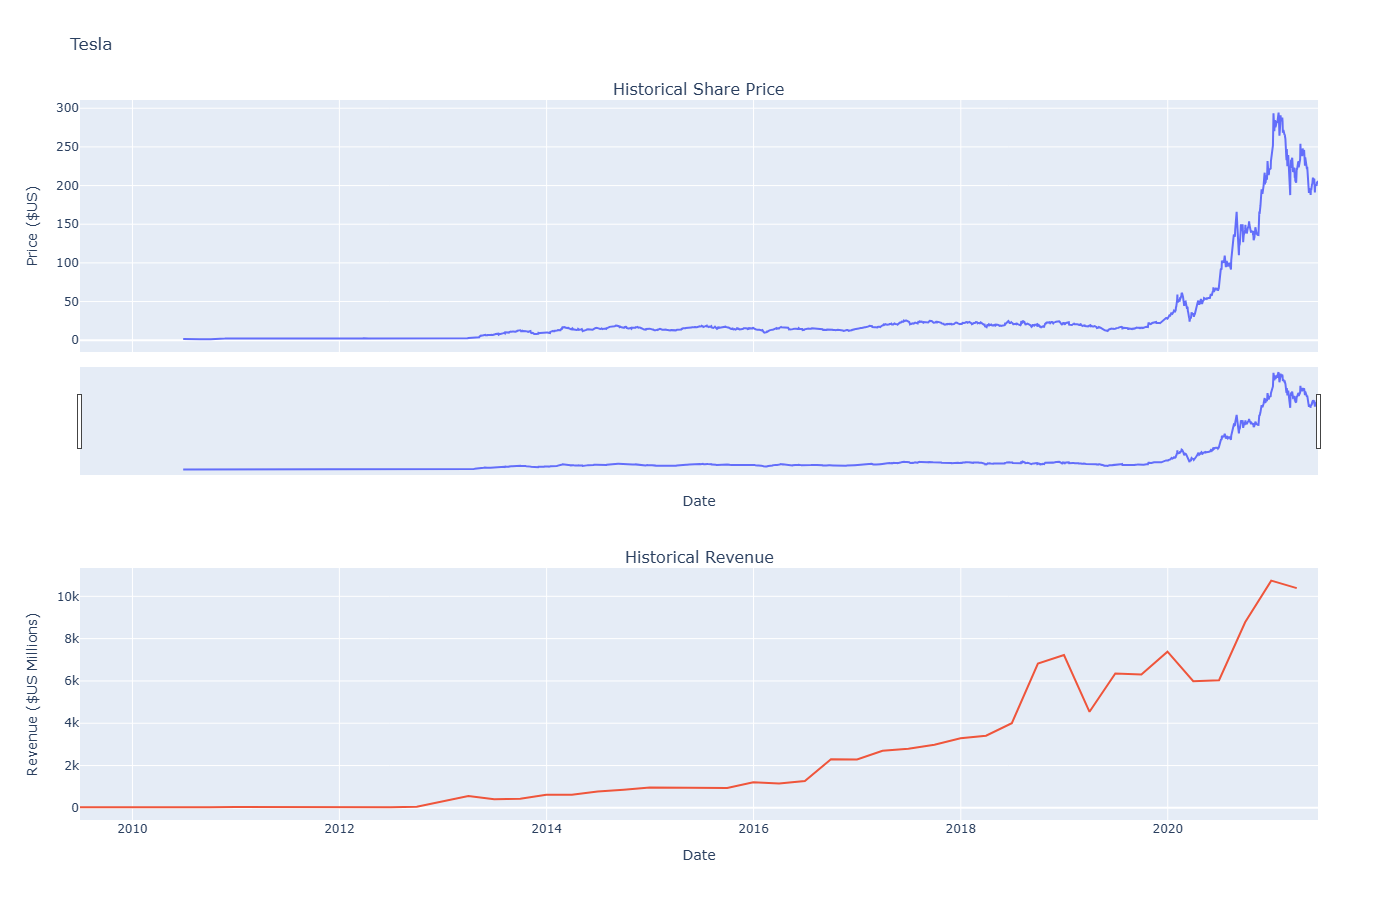

In [24]:
make_graph(tesla_data, tesla_revenue, "Tesla")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


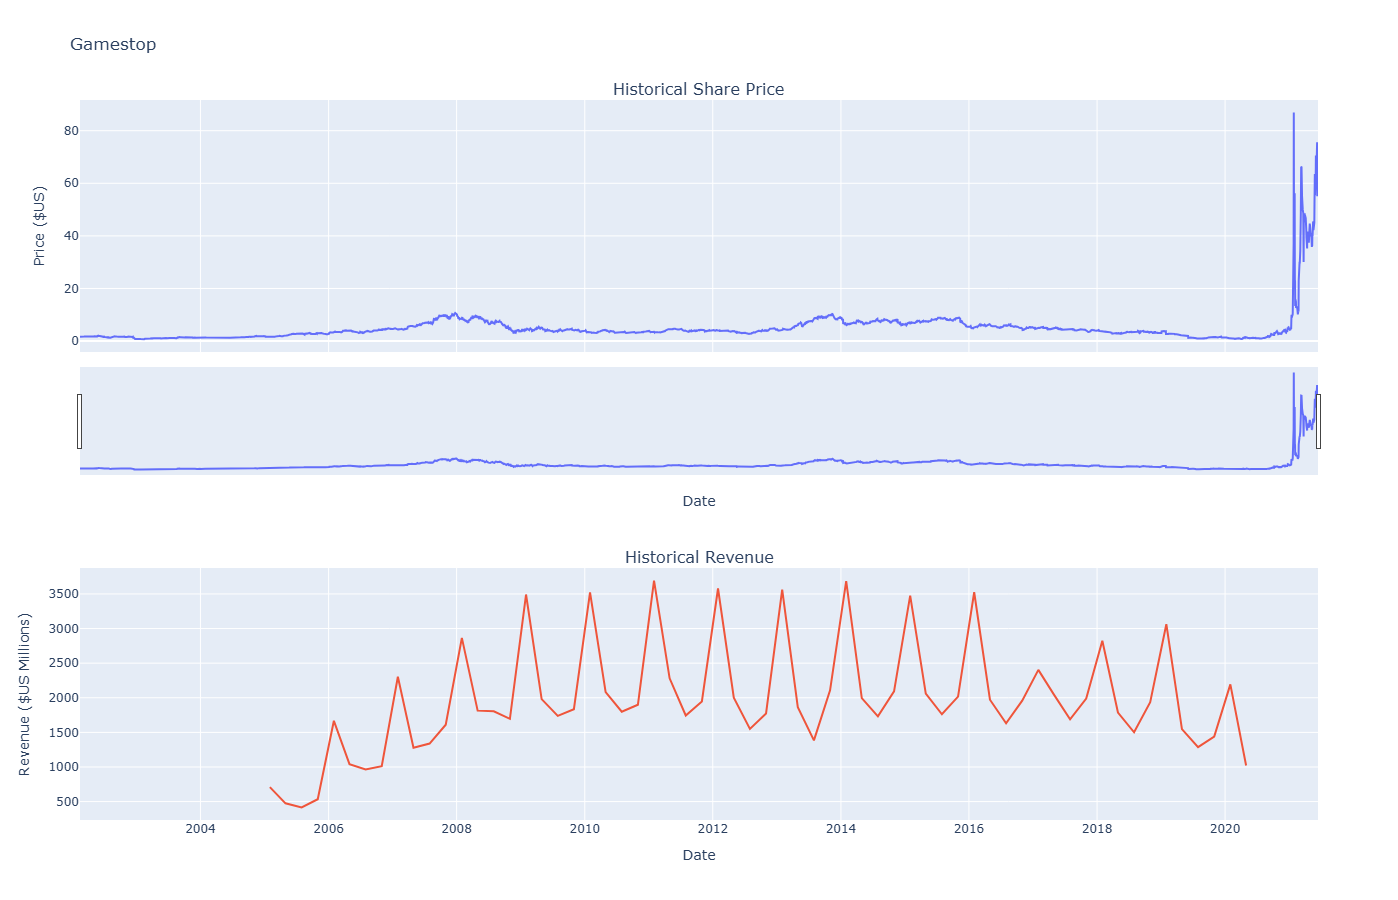

In [25]:
make_graph(gme_data, gme_revenue, 'Gamestop')

<h2>About the Authors:</h2> 


